# 과제#1. 더반찬 주문량 예측

## 0. 환경준비

### 0.1 Import

In [1]:
# 기본 라이브러리 가져오기
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split  

### 0.2 Data Loading

In [2]:
# raw data 로딩 
raw_data = pd.read_csv(r'C:\Users\user\Desktop\intern.csv')
raw_data.head()

,Unnamed: 0,ORD_NO,H_YMD,O_YMD,PKG_GOODS_NO,PKG_GOODS_NM,GOODS_NO,GOODS_NM,STD_GSGR_NO_LEV1_NM,ORD_QTY,CANCEL_QTY,RET_QTY,REAL_ORD_QTY,RECVR_ROAD_BASE_ADDR,SALE_PRICE,DISCOUNT_AMT,FINAL_PRICE
0,0,202201095519105,2022-01-11 00:00:00,2022-01-09 12:26:10,단품,단품,1901012353,수제계란말이(350g),반찬,1,0,0,1,충청북도 증평군 증평읍 송산로 11 (지평더웰아파트),6900,569.0,6331
1,1,202201105522898,2022-01-11 00:00:00,2022-01-10 10:35:49,단품,단품,1901012353,수제계란말이(350g),반찬,1,0,0,1,서울특별시 강남구 논현로85길 52 (역삼동),6900,177.0,6723
2,2,202201115527172,2022-01-12 00:00:00,2022-01-11 11:38:32,단품,단품,1901012353,수제계란말이(350g),반찬,1,0,0,1,"서울특별시 송파구 올림픽로4길 42 (잠실동, 우성아파트)",6900,221.0,6679
3,3,202201105523467,2022-01-12 00:00:00,2022-01-10 13:21:51,단품,단품,1901012353,수제계란말이(350g),반찬,1,0,0,1,강원도 속초시 도리원길 11-14 (노학동),6900,128.0,6772
4,4,202201105522519,2022-01-11 00:00:00,2022-01-10 08:16:21,단품,단품,1901012353,수제계란말이(350g),반찬,1,0,0,1,"경기도 용인시 수지구 동천로 64 (동천동, 동천마을동문굿모닝힐5차아파트)",6900,157.0,6743


In [78]:
# 카피 데이터 생성
copy_data = raw_data.copy()

# 희망배송일 순서대로 데이터를 정렬
copy_data = copy_data.sort_values(by = 'H_YMD')


copy_data.head()

,Unnamed: 0,ORD_NO,H_YMD,O_YMD,PKG_GOODS_NO,PKG_GOODS_NM,GOODS_NO,GOODS_NM,STD_GSGR_NO_LEV1_NM,ORD_QTY,CANCEL_QTY,RET_QTY,REAL_ORD_QTY,RECVR_ROAD_BASE_ADDR,SALE_PRICE,DISCOUNT_AMT,FINAL_PRICE
166288,119348,201912302355791,2020-01-01 00:00:00,2019-12-30 21:59:40,단품,단품,14375,옛날잡채(500g),메인요리,1,0,0,1,"경기도 수원시 장안구 경수대로976번길 22 (조원동, 수원 한일타운)",8600,1408.0,7192
37753,37753,201912302355557,2020-01-01 00:00:00,2019-12-30 20:50:07,단품,단품,1901012353,수제계란말이(350g),반찬,2,0,0,2,서울 성북구 동소문로34길 24 삼성아파트,6300,NaN,6300
162585,115645,201912302353567,2020-01-01 00:00:00,2019-12-30 11:02:39,단품,단품,1823,숙주나물(300g),반찬,1,0,0,1,"서울특별시 마포구 삼개로 33 (도화동, 도화3지구우성아파트)",3300,486.0,2814
164041,117101,201912302354611,2020-01-01 00:00:00,2019-12-30 15:19:58,단품,단품,1712010310,두메산나물비빔밥재료,메인요리,1,0,0,1,경기도 용인시 수지구 문인로3번길 22 (풍덕천동),6900,264.0,6636
164040,117100,201912302352965,2020-01-01 00:00:00,2019-12-30 10:08:58,단품,단품,1712010310,두메산나물비빔밥재료,메인요리,1,0,0,1,"경기도 구리시 아차산로487번길 27 (교문동, 아차산어울림아파트)",6900,317.0,6583


## 1. 데이터 전처리

### 1.0 결측치 확인

In [4]:
# 결측치가 있는 데이터 확인
copy_data.isna().sum()

Unnamed: 0                   0
ORD_NO                       0
H_YMD                        0
O_YMD                        0
PKG_GOODS_NO                 0
PKG_GOODS_NM                 0
GOODS_NO                     0
GOODS_NM                     0
STD_GSGR_NO_LEV1_NM          0
ORD_QTY                      0
CANCEL_QTY                   0
RET_QTY                      0
REAL_ORD_QTY                 0
RECVR_ROAD_BASE_ADDR         0
SALE_PRICE                   0
DISCOUNT_AMT            376247
FINAL_PRICE                  0
dtype: int64

### 1.1 예측 대상과 다른 데이터를 제거

In [80]:
copy_data[['H_YMD', 'GOODS_NM']].loc[copy_data['GOODS_NM'] == '고소한도토리묵무침(265g)']

,H_YMD,GOODS_NM
247444,2020-06-03 00:00:00,고소한도토리묵무침(265g)
258485,2020-06-03 00:00:00,고소한도토리묵무침(265g)
258467,2020-06-03 00:00:00,고소한도토리묵무침(265g)
258533,2020-06-03 00:00:00,고소한도토리묵무침(265g)
258513,2020-06-03 00:00:00,고소한도토리묵무침(265g)
...,...,...
187039,2022-02-28 00:00:00,고소한도토리묵무침(265g)
187054,2022-02-28 00:00:00,고소한도토리묵무침(265g)
197774,2022-02-28 00:00:00,고소한도토리묵무침(265g)
187092,2022-02-28 00:00:00,고소한도토리묵무침(265g)


In [81]:
copy_data[['H_YMD', 'GOODS_NM']].loc[copy_data['GOODS_NM'] == '꼬막무침 (250g)']

,H_YMD,GOODS_NM
171876,2020-01-01 00:00:00,꼬막무침 (250g)
162252,2020-01-01 00:00:00,꼬막무침 (250g)
171662,2020-01-01 00:00:00,꼬막무침 (250g)
171659,2020-01-01 00:00:00,꼬막무침 (250g)
171657,2020-01-01 00:00:00,꼬막무침 (250g)
...,...,...
670874,2021-07-02 00:00:00,꼬막무침 (250g)
649116,2021-07-02 00:00:00,꼬막무침 (250g)
670873,2021-07-03 00:00:00,꼬막무침 (250g)
641145,2021-07-09 00:00:00,꼬막무침 (250g)


In [83]:
copy_data[['H_YMD', 'GOODS_NM']].loc[copy_data['GOODS_NM'] == '건고사리나물볶음(150g)']

,H_YMD,GOODS_NM
167308,2020-01-01 00:00:00,건고사리나물볶음(150g)
167529,2020-01-01 00:00:00,건고사리나물볶음(150g)
164823,2020-01-01 00:00:00,건고사리나물볶음(150g)
174673,2020-01-01 00:00:00,건고사리나물볶음(150g)
167336,2020-01-01 00:00:00,건고사리나물볶음(150g)
...,...,...
397331,2021-10-30 00:00:00,건고사리나물볶음(150g)
397444,2021-10-30 00:00:00,건고사리나물볶음(150g)
395160,2021-10-30 00:00:00,건고사리나물볶음(150g)
386418,2021-10-30 00:00:00,건고사리나물볶음(150g)


In [91]:
# 예측 대상에는 없는 상품들은 모두 nan값으로 변경
copy_data['GOODS_NM'].loc[copy_data['GOODS_NM'] == '꼬막무침 (250g)'] = '꼬막무침 (260g)'
copy_data['GOODS_NM'].loc[copy_data['GOODS_NM'] == '고소한도토리묵무침(265g)'] = '고소한도토리묵무침(360g)'
copy_data['GOODS_NM'].loc[copy_data['GOODS_NM'] == '건고사리나물볶음(150g)'] = '고사리나물볶음(150g)'

C:\Users\user\AppData\Local\Temp\ipykernel_6876\3925397722.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_data['GOODS_NM'].loc[copy_data['GOODS_NM'] == '꼬막무침 (250g)'] = '꼬막무침 (260g)'
C:\Users\user\AppData\Local\Temp\ipykernel_6876\3925397722.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_data['GOODS_NM'].loc[copy_data['GOODS_NM'] == '고소한도토리묵무침(265g)'] = '고소한도토리묵무침(360g)'
C:\Users\user\AppData\Local\Temp\ipykernel_6876\3925397722.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

### 1.2 잘못 적재되어 있는 데이터 전처리

In [92]:
# 내일한정, 한정판매는 단품으로 대체
# 한정판매 중에는 단품이 아닌 세트도 있어서 이를 유의해야 함(ex. '[한정판매]손님초대상 set', '[한정판매]반찬 한 상 set', '[한정판매]키즈 set')

# 내일한정이 붙은 제품은 모두 단품인 것을 확인하여 카테고리를 단품으로 바꿔줌, 
# [내일한정] 고소한도토리묵무침(265g), [내일한정] 건고사리나물볶음(150g), [내일한정] 꼬막무침 (250g)은 제외
copy_data['PKG_GOODS_NM'].loc[copy_data['PKG_GOODS_NM'].str.contains('내일한정')] = '단품'

# 한정판매 중에서 두 제품만 단품이었기에 두 제품을 단품으로 바꿔줌
copy_data['PKG_GOODS_NM'].loc[copy_data['PKG_GOODS_NM'] == '[한정판매] 두메산나물비빔밥재료'] = '단품'  
copy_data['PKG_GOODS_NM'].loc[copy_data['PKG_GOODS_NM'] == '[한정판매] 옛날잡채(500g)'] = '단품'

# 단품으로 바꿔주지 않은 모든 제품을 세트로 바꿔줌
copy_data['PKG_GOODS_NM'].loc[copy_data['PKG_GOODS_NM'] != '단품'] = '세트'

C:\Users\user\AppData\Local\Temp\ipykernel_6876\1220614922.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_data['PKG_GOODS_NM'].loc[copy_data['PKG_GOODS_NM'].str.contains('내일한정')] = '단품'
C:\Users\user\AppData\Local\Temp\ipykernel_6876\1220614922.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_data['PKG_GOODS_NM'].loc[copy_data['PKG_GOODS_NM'] == '[한정판매] 두메산나물비빔밥재료'] = '단품'
C:\Users\user\AppData\Local\Temp\ipykernel_6876\1220614922.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

### 1.3 데이터 타입 변환

In [93]:
# 자재코드를 추후 가변수화를 위해 문자열 변수로 변환

copy_data['GOODS_NO'] = copy_data['GOODS_NO'].astype(str)

In [94]:
# 희망배송일 변수를 datetime 형식으로 변환

copy_data['H_YMD'] = pd.to_datetime(copy_data['H_YMD'])

### 1.4 특정 컬럼의 결측치 채우기 

In [95]:
# 할인액의 NaN값을 모두 0으로 대체
# 할인되지 않은 상품을 산것으로 추측되어 이 경우 할인액은 0이 되는게 맞다.

copy_data['DISCOUNT_AMT'].fillna(0, inplace=True)

In [96]:
# 위에서 만든 예측 대상과 다른 데이터에 들어있는 NaN 값을 모두 제거

copy_data.dropna(inplace=True)

In [97]:
copy_data.isna().sum()

Unnamed: 0              0
ORD_NO                  0
H_YMD                   0
O_YMD                   0
PKG_GOODS_NO            0
PKG_GOODS_NM            0
GOODS_NO                0
GOODS_NM                0
STD_GSGR_NO_LEV1_NM     0
ORD_QTY                 0
CANCEL_QTY              0
RET_QTY                 0
REAL_ORD_QTY            0
RECVR_ROAD_BASE_ADDR    0
SALE_PRICE              0
DISCOUNT_AMT            0
FINAL_PRICE             0
dtype: int64

### 1.5 Feature Engineerung

In [98]:
# 할인율을 나타내는 SALE_PERCENTAGE 변수 생성
# 할인액 / 판매가격 * 100

copy_data['SALE_PERCETANGE'] = (copy_data['DISCOUNT_AMT'] / copy_data['SALE_PRICE']) * 100

In [99]:
# 희망배송일의 연도,월,일,시간,분,초를 각각 컬럼으로 만들어줌

copy_data['year'] = copy_data['H_YMD'].dt.year
copy_data['month'] = copy_data['H_YMD'].dt.month
copy_data['day'] = copy_data['H_YMD'].dt.day
copy_data['hour'] = copy_data['H_YMD'].dt.hour
copy_data['minute'] = copy_data['H_YMD'].dt.minute
copy_data['second'] = copy_data['H_YMD'].dt.second


In [14]:
copy_data.head()

,Unnamed: 0,ORD_NO,H_YMD,O_YMD,PKG_GOODS_NO,PKG_GOODS_NM,GOODS_NO,GOODS_NM,STD_GSGR_NO_LEV1_NM,ORD_QTY,...,SALE_PRICE,DISCOUNT_AMT,FINAL_PRICE,SALE_PERCETANGE,year,month,day,hour,minute,second
166288,119348,201912302355791,2020-01-01,2019-12-30 21:59:40,단품,단품,14375,옛날잡채(500g),메인요리,1,...,8600,1408.0,7192,16.372093,2020,1,1,0,0,0
37753,37753,201912302355557,2020-01-01,2019-12-30 20:50:07,단품,단품,1901012353,수제계란말이(350g),반찬,2,...,6300,0.0,6300,0.000000,2020,1,1,0,0,0
162585,115645,201912302353567,2020-01-01,2019-12-30 11:02:39,단품,단품,1823,숙주나물(300g),반찬,1,...,3300,486.0,2814,14.727273,2020,1,1,0,0,0
164041,117101,201912302354611,2020-01-01,2019-12-30 15:19:58,단품,단품,1712010310,두메산나물비빔밥재료,메인요리,1,...,6900,264.0,6636,3.826087,2020,1,1,0,0,0
164040,117100,201912302352965,2020-01-01,2019-12-30 10:08:58,단품,단품,1712010310,두메산나물비빔밥재료,메인요리,1,...,6900,317.0,6583,4.594203,2020,1,1,0,0,0


### 1.6 컬럼 제거

In [100]:
# 데이터의 컬럼 확인
copy_data.columns 

Index(['Unnamed: 0', 'ORD_NO', 'H_YMD', 'O_YMD', 'PKG_GOODS_NO',
       'PKG_GOODS_NM', 'GOODS_NO', 'GOODS_NM', 'STD_GSGR_NO_LEV1_NM',
       'ORD_QTY', 'CANCEL_QTY', 'RET_QTY', 'REAL_ORD_QTY',
       'RECVR_ROAD_BASE_ADDR', 'SALE_PRICE', 'DISCOUNT_AMT', 'FINAL_PRICE',
       'SALE_PERCETANGE', 'year', 'month', 'day', 'hour', 'minute', 'second'],
      dtype='object')

In [101]:
# 불필요한 컬럼들 제거
# Unnamed: 단순 데이터 순서를 나타내는 컬럼이기에 삭제
# O_YMD: 주문 시간은 오더 건수와 큰 상관이 없기에 삭제
# ORD_NO: 주문 내용의 일련번호이기에 삭제
# PKG_GOODS_NO: PKG_GOODS_NM과 내용이 겹치고 잘못 적재된 데이터이기에 삭제
# RECVR_ROAD_BASE_ADDR: 비대면으로 주문하는 시대에 지역정보는 큰 의미가 없을 것 같아 삭제

dummy_col = ['Unnamed: 0', 'O_YMD', 'ORD_NO', 'PKG_GOODS_NO', 'RECVR_ROAD_BASE_ADDR']
copy_data = copy_data.drop(dummy_col, axis=1)

copy_data.head()

,H_YMD,PKG_GOODS_NM,GOODS_NO,GOODS_NM,STD_GSGR_NO_LEV1_NM,ORD_QTY,CANCEL_QTY,RET_QTY,REAL_ORD_QTY,SALE_PRICE,DISCOUNT_AMT,FINAL_PRICE,SALE_PERCETANGE,year,month,day,hour,minute,second
166288,2020-01-01,단품,14375,옛날잡채(500g),메인요리,1,0,0,1,8600,1408.0,7192,16.372093,2020,1,1,0,0,0
37753,2020-01-01,단품,1901012353,수제계란말이(350g),반찬,2,0,0,2,6300,0.0,6300,0.000000,2020,1,1,0,0,0
162585,2020-01-01,단품,1823,숙주나물(300g),반찬,1,0,0,1,3300,486.0,2814,14.727273,2020,1,1,0,0,0
164041,2020-01-01,단품,1712010310,두메산나물비빔밥재료,메인요리,1,0,0,1,6900,264.0,6636,3.826087,2020,1,1,0,0,0
164040,2020-01-01,단품,1712010310,두메산나물비빔밥재료,메인요리,1,0,0,1,6900,317.0,6583,4.594203,2020,1,1,0,0,0


### 1.7 이상치 제거

c:\Users\user\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\Users\user\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\Users\user\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\Users\user\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\Users\user\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\Users\user\anaconda3\lib\site-package

<AxesSubplot:xlabel='FINAL_PRICE'>

c:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


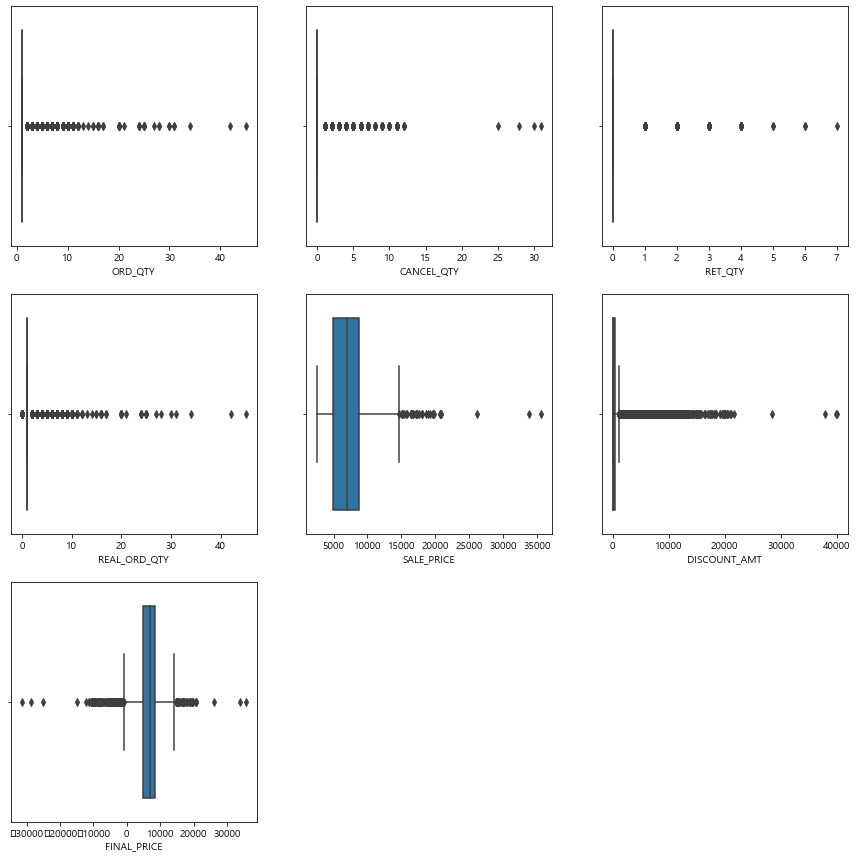

In [103]:
plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
sns.boxplot(x='ORD_QTY',  orient = "v", data=copy_data)

plt.subplot(3,3,2)
sns.boxplot(x='CANCEL_QTY', orient = "v", data=copy_data)

plt.subplot(3,3,3)
sns.boxplot(x='RET_QTY', orient = "v", data=copy_data)

plt.subplot(3,3,4)
sns.boxplot(x='REAL_ORD_QTY', orient = "v", data=copy_data)

plt.subplot(3,3,5)
sns.boxplot(x='SALE_PRICE', orient = "v", data=copy_data)

plt.subplot(3,3,6)
sns.boxplot(x='DISCOUNT_AMT', orient = "v", data=copy_data)

plt.subplot(3,3,7)
sns.boxplot(x='FINAL_PRICE', orient = "v", data=copy_data)

In [104]:
def outlier(df,col):
    q1 = df[col].quantile(0.25) # 1사분위
    q3 = df[col].quantile(0.75) # 3사분위 
    iqr = q3 - q1               # iqr 수치

    df.loc[(df[col] > (q3 + 1.5 * iqr)) | (df[col] < (q1 - 1.5 * iqr)), col] = df[col].median() # 이상치를 중앙값으로 대체

ol_col = ['ORD_QTY', 'CANCEL_QTY', 'RET_QTY', 'REAL_ORD_QTY', 'SALE_PRICE', 'FINAL_PRICE']

for i in ol_col:
    print(i)
    outlier(copy_data, i)

ORD_QTY
CANCEL_QTY
RET_QTY
REAL_ORD_QTY
SALE_PRICE
FINAL_PRICE


c:\Users\user\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\Users\user\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\Users\user\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\Users\user\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\Users\user\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\Users\user\anaconda3\lib\site-package

<AxesSubplot:xlabel='FINAL_PRICE'>

c:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


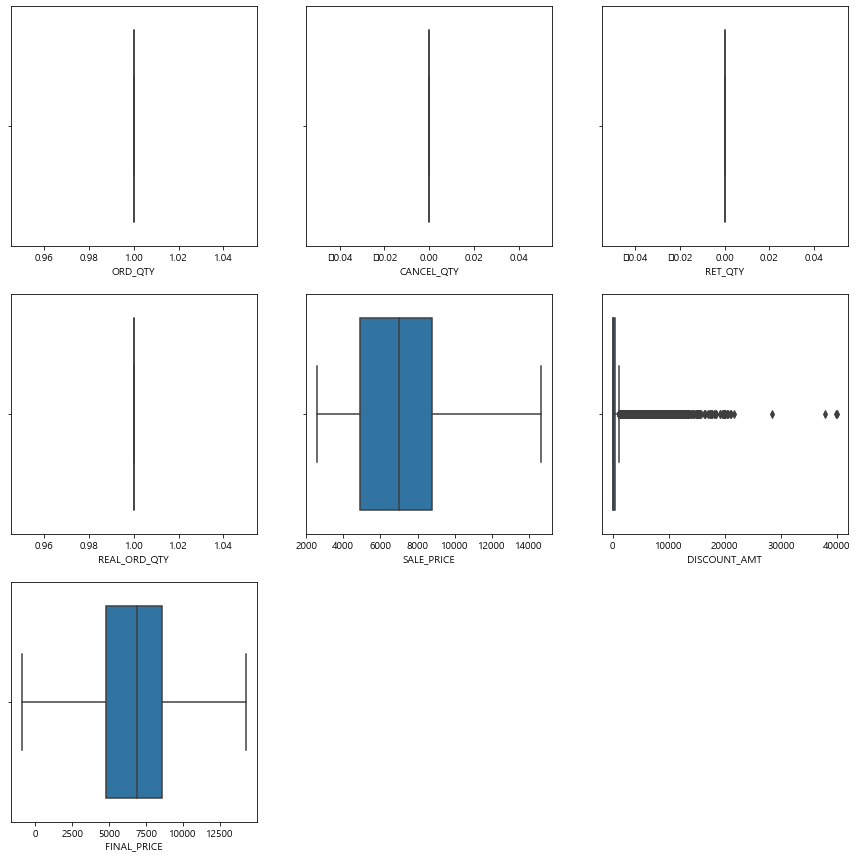

In [105]:
plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
sns.boxplot(x='ORD_QTY',  orient = "v", data=copy_data)

plt.subplot(3,3,2)
sns.boxplot(x='CANCEL_QTY', orient = "v", data=copy_data)

plt.subplot(3,3,3)
sns.boxplot(x='RET_QTY', orient = "v", data=copy_data)

plt.subplot(3,3,4)
sns.boxplot(x='REAL_ORD_QTY', orient = "v", data=copy_data)

plt.subplot(3,3,5)
sns.boxplot(x='SALE_PRICE', orient = "v", data=copy_data)

plt.subplot(3,3,6)
sns.boxplot(x='DISCOUNT_AMT', orient = "v", data=copy_data)

plt.subplot(3,3,7)
sns.boxplot(x='FINAL_PRICE', orient = "v", data=copy_data)


### 1.8 가변수화

In [106]:
# 가변수화가 필요한 데이터들을 확인한다.

copy_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 724702 entries, 166288 to 237568
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   H_YMD                724702 non-null  datetime64[ns]
 1   PKG_GOODS_NM         724702 non-null  object        
 2   GOODS_NO             724702 non-null  object        
 3   GOODS_NM             724702 non-null  object        
 4   STD_GSGR_NO_LEV1_NM  724702 non-null  object        
 5   ORD_QTY              724702 non-null  int64         
 6   CANCEL_QTY           724702 non-null  int64         
 7   RET_QTY              724702 non-null  int64         
 8   REAL_ORD_QTY         724702 non-null  int64         
 9   SALE_PRICE           724702 non-null  int64         
 10  DISCOUNT_AMT         724702 non-null  float64       
 11  FINAL_PRICE          724702 non-null  int64         
 12  SALE_PERCETANGE      724702 non-null  float64       
 13  year     

In [107]:
cols = ['PKG_GOODS_NM', 'GOODS_NO', 'GOODS_NM', 'STD_GSGR_NO_LEV1_NM']

copy_data= pd.get_dummies(copy_data, columns = cols)

### 1.9 데이터를 타겟에 맞게 변형

In [108]:
date = copy_data['H_YMD']
test_data = copy_data.copy()

In [109]:
week = [g for n, g in test_data.set_index('H_YMD').groupby(pd.Grouper(freq='W'))]

In [110]:
# 데이터를 주 단위로 groupby 하고 해당 주에 팔린 상품의 개수를 sum()한다.

resampled = copy_data.resample(rule='1W', on='H_YMD')
resampled.sum()

copy_data = resampled.sum()

In [101]:
#copy_data.to_csv('C:\\Users\\user\\Desktop\\raw.csv', index=False, encoding='utf-8-sig')

## 2. 데이터 분할

### 2.0 컬럼명 전처리

In [111]:
# 데이터의 컬럼에 '['나 ','같은 특수기호가 들어가 있으면 학습이 안되기 때문에 제거해준다.
import re

regex = re.compile(r"\[|\]|<", re.IGNORECASE)

copy_data.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in copy_data.columns.values]

### 2.1 train/val, test 데이터 나누기

In [112]:
# 만들어진 데이터 기준 121행부터 2022년 5월의 데이터이므로 2022년 5월 이후 데이터를 test 데이터로 사용한다
# 104: 2022 전체 데이터
# 121: 2022.05 데이터

train_data = copy_data[:104]
test_data = copy_data[104:]

# train_data = copy_data[:121]
# test_data = copy_data[121:]

test_data.head()

,ORD_QTY,CANCEL_QTY,RET_QTY,REAL_ORD_QTY,SALE_PRICE,DISCOUNT_AMT,FINAL_PRICE,SALE_PERCETANGE,year,month,...,GOODS_NM_순살코다리강정(180g),GOODS_NM_양장피,GOODS_NM_열무비빔밥재료믹스(2인분),GOODS_NM_옛날잡채(500g),GOODS_NM_우삼겹숙주볶음(250g),GOODS_NM_채소계란찜(340g),GOODS_NM_한돈 제육볶음(700g),STD_GSGR_NO_LEV1_NM_국,STD_GSGR_NO_LEV1_NM_메인요리,STD_GSGR_NO_LEV1_NM_반찬
H_YMD,,,,,,,,,,,,,,,,,,,,,
2022-01-02,6498,0,0,6498,48837850,4032515.0,44820733,43276.765182,13132990,72124,...,185.0,323.0,0.0,869.0,86.0,415.0,497.0,13.0,3072.0,3413.0
2022-01-09,6116,0,0,6116,46511500,3919181.0,42601311,43074.366560,12366552,6116,...,179.0,224.0,0.0,818.0,65.0,451.0,564.0,205.0,2083.0,3828.0
2022-01-16,6371,0,0,6371,48268450,4680517.0,43617237,51925.630298,12882162,6371,...,151.0,204.0,0.0,900.0,104.0,421.0,593.0,172.0,2273.0,3926.0
2022-01-23,4321,0,0,4321,33704700,2492894.0,31211806,27786.574661,8737062,4321,...,0.0,202.0,0.0,937.0,2.0,0.0,376.0,155.0,1930.0,2236.0
2022-01-30,6891,0,0,6891,53177600,3847123.0,49370250,46348.421897,13933602,6891,...,0.0,336.0,0.0,2516.0,2.0,0.0,545.0,112.0,3819.0,2960.0


### 2.2 Target 데이터 설정

In [113]:
# 컬럼명들을 확인한다

train_data.columns

Index(['ORD_QTY', 'CANCEL_QTY', 'RET_QTY', 'REAL_ORD_QTY', 'SALE_PRICE',
       'DISCOUNT_AMT', 'FINAL_PRICE', 'SALE_PERCETANGE', 'year', 'month',
       'day', 'hour', 'minute', 'second', 'PKG_GOODS_NM_단품', 'PKG_GOODS_NM_세트',
       'GOODS_NO_13529', 'GOODS_NO_13957', 'GOODS_NO_14375', 'GOODS_NO_14985',
       'GOODS_NO_1712010310', 'GOODS_NO_1803010879', 'GOODS_NO_1805011121',
       'GOODS_NO_1806011271', 'GOODS_NO_1808011751', 'GOODS_NO_1823',
       'GOODS_NO_1901012353', 'GOODS_NO_1903012675', 'GOODS_NO_1909013359',
       'GOODS_NO_2010014667', 'GOODS_NO_2010014707', 'GOODS_NO_2012014895',
       'GOODS_NO_2103015231', 'GOODS_NO_2204016772', 'GOODS_NO_3273',
       'GOODS_NO_4092', 'GOODS_NM__심방골주부X더반찬_ 시골 돼지짜글이(600g)',
       'GOODS_NM_가정집 오징어불고기/셀프(380g)', 'GOODS_NM_건표고버섯볶음',
       'GOODS_NM_고구마 품은 라자냐(450g)', 'GOODS_NM_고사리나물볶음(150g)',
       'GOODS_NM_고소한도토리묵무침(360g)', 'GOODS_NM_꼬막무침 (260g)',
       'GOODS_NM_두메산나물비빔밥재료', 'GOODS_NM_메밀소바(2인분)', 'GOODS_NM_셀프두부조림(600g)',
      

In [115]:
# 타겟이 되는 20개 제품을 설정한다

target = ['GOODS_NM__심방골주부X더반찬_ 시골 돼지짜글이(600g)',
       'GOODS_NM_가정집 오징어불고기/셀프(380g)', 'GOODS_NM_고사리나물볶음(150g)',
       'GOODS_NM_건표고버섯볶음', 'GOODS_NM_고구마 품은 라자냐(450g)',
       'GOODS_NM_고소한도토리묵무침(360g)', 'GOODS_NM_꼬막무침 (260g)',
       'GOODS_NM_두메산나물비빔밥재료', 'GOODS_NM_메밀소바(2인분)', 'GOODS_NM_셀프두부조림(600g)',
       'GOODS_NM_소고기유니짜장소스(1인분, 200g)', 'GOODS_NM_수제계란말이(350g)',
       'GOODS_NM_숙주나물(300g)', 'GOODS_NM_순살코다리강정(180g)', 'GOODS_NM_양장피',
       'GOODS_NM_열무비빔밥재료믹스(2인분)', 'GOODS_NM_옛날잡채(500g)',
       'GOODS_NM_우삼겹숙주볶음(250g)', 'GOODS_NM_채소계란찜(340g)',
       'GOODS_NM_한돈 제육볶음(700g)']

print(len(target)) # // 20

# 학습&검증 데이터와 테스트 데이터를 나눈다.
# X, y -> 학습 및 검증데이터
# X_test, y_test -> 테스트데이터 
X, X_test = train_data.drop(target, axis=1), test_data.drop(target, axis=1)
y, y_test = train_data[target], test_data[target]

20


### 2.3 Target / Validation data 분할

In [116]:
# train_test_split 메서드를 사용하여 학습 검증 데이터를 7:3비율로 나눈다

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = .3, random_state = 2022)

In [117]:
# 학습데이터 모양 확인
X_train.shape

(72, 39)

In [118]:
X_train.head()

,ORD_QTY,CANCEL_QTY,RET_QTY,REAL_ORD_QTY,SALE_PRICE,DISCOUNT_AMT,FINAL_PRICE,SALE_PERCETANGE,year,month,...,GOODS_NO_2010014667,GOODS_NO_2010014707,GOODS_NO_2012014895,GOODS_NO_2103015231,GOODS_NO_2204016772,GOODS_NO_3273,GOODS_NO_4092,STD_GSGR_NO_LEV1_NM_국,STD_GSGR_NO_LEV1_NM_메인요리,STD_GSGR_NO_LEV1_NM_반찬
H_YMD,,,,,,,,,,,,,,,,,,,,,
2020-08-16,5175,0,0,5175,35865134,1533698.0,34566664,20432.485494,10453500,41400,...,0.0,0.0,0.0,0.0,0.0,281.0,245.0,0.0,2642.0,2533.0
2021-11-28,5280,0,0,5280,37768730,2877138.0,34908762,33290.846066,10670880,58080,...,90.0,92.0,405.0,142.0,0.0,364.0,222.0,0.0,3031.0,2249.0
2020-01-12,3810,0,0,3810,25869300,818906.0,25050394,11264.110597,7696200,3810,...,0.0,0.0,0.0,0.0,0.0,251.0,138.0,0.0,1960.0,1850.0
2020-06-28,5577,0,0,5577,39839890,2470593.0,37410591,33703.349751,11265540,33462,...,0.0,0.0,0.0,0.0,0.0,309.0,114.0,0.0,3029.0,2548.0
2020-11-29,5737,0,0,5737,39516210,1879796.0,37646224,26385.982262,11588740,63107,...,293.0,278.0,0.0,0.0,0.0,303.0,216.0,0.0,2627.0,3110.0


### 2.4 스케일링

In [119]:
# 범위가 제각각인 각 컬럼들을 0~1 사이에 범위로 조정해준다.

from sklearn.preprocessing import MinMaxScaler
col_x = list(X)
scaler = MinMaxScaler()
X_train_s = scaler.fit_transform(X_train)
X_val_s = scaler.transform(X_val)
X_test_s = scaler.transform(X_test)

## 3. 모델링

### 3.0 모델 라이브러리 임포트

In [120]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### 3.1 모델 선언 및 학습

In [121]:
X_test_s.shape

(23, 39)

In [122]:
X_train

,ORD_QTY,CANCEL_QTY,RET_QTY,REAL_ORD_QTY,SALE_PRICE,DISCOUNT_AMT,FINAL_PRICE,SALE_PERCETANGE,year,month,...,GOODS_NO_2010014667,GOODS_NO_2010014707,GOODS_NO_2012014895,GOODS_NO_2103015231,GOODS_NO_2204016772,GOODS_NO_3273,GOODS_NO_4092,STD_GSGR_NO_LEV1_NM_국,STD_GSGR_NO_LEV1_NM_메인요리,STD_GSGR_NO_LEV1_NM_반찬
H_YMD,,,,,,,,,,,,,,,,,,,,,
2020-08-16,5175,0,0,5175,35865134,1533698.0,34566664,20432.485494,10453500,41400,...,0.0,0.0,0.0,0.0,0.0,281.0,245.0,0.0,2642.0,2533.0
2021-11-28,5280,0,0,5280,37768730,2877138.0,34908762,33290.846066,10670880,58080,...,90.0,92.0,405.0,142.0,0.0,364.0,222.0,0.0,3031.0,2249.0
2020-01-12,3810,0,0,3810,25869300,818906.0,25050394,11264.110597,7696200,3810,...,0.0,0.0,0.0,0.0,0.0,251.0,138.0,0.0,1960.0,1850.0
2020-06-28,5577,0,0,5577,39839890,2470593.0,37410591,33703.349751,11265540,33462,...,0.0,0.0,0.0,0.0,0.0,309.0,114.0,0.0,3029.0,2548.0
2020-11-29,5737,0,0,5737,39516210,1879796.0,37646224,26385.982262,11588740,63107,...,293.0,278.0,0.0,0.0,0.0,303.0,216.0,0.0,2627.0,3110.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-12,4881,0,0,4881,39624500,4199922.0,35424578,46847.649798,9864501,43929,...,138.0,0.0,398.0,174.0,0.0,4.0,211.0,0.0,3514.0,1367.0
2021-01-24,7623,0,0,7623,56394500,3206377.0,53196851,40365.347538,15406083,7623,...,261.0,407.0,402.0,0.0,0.0,326.0,209.0,0.0,4260.0,3363.0
2020-12-13,6148,0,0,6148,42617600,1523106.0,41107104,21753.326390,12418960,73776,...,320.0,327.0,0.0,0.0,0.0,284.0,183.0,0.0,2983.0,3165.0


In [123]:
def evaluate_regr(y, pred):
    mse = mean_squared_error(y, pred)
    rmse_val = np.sqrt(mse)
    mae_val = mean_absolute_error(y, pred)
    r2 = r2_score(y, pred)
    print('RMSE : {} | MAE : {} | r2 : {} '.format(round(rmse_val,5),round(mae_val,5),round(r2,5)))

# 여러 모델의 성능 확인 함수 
def get_model_predict(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    print('###', model.__class__.__name__,'###')
    evaluate_regr(y_test, pred)
#--------------------------------------------------------------------
#모델별로 평가 확인 

ridge_reg = Ridge(alpha=0)      # best alpha = 0
lasso_reg = Lasso(alpha=1)        # best alpha = 1
tree_reg = DecisionTreeRegressor(random_state=13)
forest_reg = RandomForestRegressor(n_estimators=100,random_state=13)

for model in [ridge_reg, lasso_reg,tree_reg,forest_reg]:
# for model in [forest_reg]:
    get_model_predict(model, X_train_s, X_val_s, y_train, y_val)

### Ridge ###
RMSE : 0.0 | MAE : 0.0 | r2 : 1.0 
### Lasso ###
RMSE : 5.35358 | MAE : 3.54878 | r2 : 0.9978 
### DecisionTreeRegressor ###
RMSE : 162.01691 | MAE : 83.06094 | r2 : 0.31246 


c:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


### RandomForestRegressor ###
RMSE : 112.41536 | MAE : 55.62166 | r2 : 0.71303 


### 3.2 모델 하이퍼파라미터 튜닝

In [124]:
from sklearn.model_selection import GridSearchCV

# 1. Ridge - alpha값이 클수록(penalty 증가) 계수의 크기가 줄어듬
# 영향력이 큰 계수의 영향력을 줄임 / 변수를 축소, 다중공선성을 방지
param_grid = [
    {'alpha': [0, 0.05, 0.1, 0.5, 1, 5]},
]

ridge_grid_search = GridSearchCV(ridge_reg, param_grid, cv=5,
                           scoring='r2',
                           return_train_score=True)
ridge_grid_search.fit(X_train_s, y_train)

print('best_params_: ', ridge_grid_search.best_params_)

cvres = ridge_grid_search.cv_results_
for mean_test_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_test_score, params)
    
# best_params_:  {'alpha': 0.1}, 그러나 alpha 값에 따른 score 변동 거의 없음.

best_params_:  {'alpha': 0}
1.0 {'alpha': 0}
0.9953823399719575 {'alpha': 0.05}
0.9873253334230437 {'alpha': 0.1}
0.9252345731500473 {'alpha': 0.5}
0.8723288840316205 {'alpha': 1}
0.6823103735587182 {'alpha': 5}


In [125]:
# 2. Lasso - alpha 조금만 키워도 계수가 완전히 0이 되는 변수 증가 
# feaure selection, 중요한 변수만 택함
param_grid = [
    {'alpha': [0, 0.05, 0.1, 0.5, 1]},
    ]

lasso_grid_search = GridSearchCV(lasso_reg, param_grid, cv=5,
                          scoring='r2',
                          return_train_score=True)
lasso_grid_search.fit(X_train, y_train)

print ('best_params_: ', lasso_grid_search.best_params_)

cvres = lasso_grid_search.cv_results_
for mean_test_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_test_score, params)  
# best_params_:  {'alpha': 0} : 이 데이터로는 Lasso는 하지 않는 것이 바람직.
# alpha 값 감소에 따라 mean_test_score 급격히 감소

c:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_

best_params_:  {'alpha': 1}
0.9999771023760271 {'alpha': 0}
0.999977050421372 {'alpha': 0.05}
0.9999771099195607 {'alpha': 0.1}
0.9999807473160651 {'alpha': 0.5}
0.9999872670417611 {'alpha': 1}


c:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.700e+01, tolerance: 6.939e+01
  model = cd_fast.enet_coordinate_descent(
c:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.386e+01, tolerance: 1.316e+01
  model = cd_fast.enet_coordinate_descent(
c:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.029e+01, tolerance: 

In [126]:
# 3. Randomforest - 가장 복잡한 모델로, 예측 성능은 좋으나 모델이 복잡하고, 가역성이 좋지않음.
param_grid = [
    {'n_estimators': [30, 50, 70, 100], 'max_features':[2,4,6,8]},
    {'bootstrap':[False], 'n_estimators': [3, 10], 'max_features':[2,3,4] }
    ]

forest_reg = RandomForestRegressor(random_state=13)
rf_grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)
rf_grid_search.fit(X_train, y_train)

print ('best_params_: ', rf_grid_search.best_params_)
# best_params_: {'max_features': 8, 'n_estimators': 100}

best_params_:  {'max_features': 8, 'n_estimators': 70}


### 3.3 k-fold 교차검증

In [127]:
from sklearn.model_selection import cross_val_score

In [128]:
def display_socres(model):
    scores = cross_val_score(model, X_test, y_test,
                             scoring="neg_mean_squared_error", cv=5)
    model_rmse_scores = np.sqrt(-scores)
    print('###', model.__class__.__name__, '###')
    print("점수:", model_rmse_scores)
    print("평균:", model_rmse_scores.mean())
    print("표준편차:", model_rmse_scores.std())


for model in [ridge_reg, lasso_reg, tree_reg, forest_reg]:
    display_socres(model)

c:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
c:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:194: LinAlgWarning: Ill-conditioned matrix (rcond=2.32404e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
c:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
c:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:194: LinAlgWarning: Ill-conditioned matrix (rcond=2.12053e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
c:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution ins

### Ridge ###
점수: [133.20583534  66.72072806  39.21378923  43.2131674   72.05735144]
평균: 70.88217429306023
표준편차: 33.67906755848313


c:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.232e+01, tolerance: 5.504e+01
  model = cd_fast.enet_coordinate_descent(
c:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.965e+01, tolerance: 2.524e+01
  model = cd_fast.enet_coordinate_descent(
c:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.384e+01, tolerance: 

### Lasso ###
점수: [140.67090777  66.74675328  41.19476224  51.76769611  70.48228647]
평균: 74.17248117227601
표준편차: 34.87206346662375
### DecisionTreeRegressor ###
점수: [314.75946372 112.05146139  89.52022118 247.7059749  171.33103922]
평균: 187.07363208119486
표준편차: 84.11037498400387
### RandomForestRegressor ###
점수: [222.00316511 112.56772713  59.86420435  81.13975578 151.95538412]
평균: 125.50604729651619
표준편차: 57.36877314711063


In [129]:
R2 = []

def display_socres(model):
    scores = cross_val_score(model, X_test, y_test,
                             scoring="r2", cv=5)
    model_rmse_scores = np.sqrt(-scores)
    print('###', model.__class__.__name__, '###')
    print("점수:", model_rmse_scores)
    print("평균:", model_rmse_scores.mean())
    print("표준편차:", model_rmse_scores.std())


for model in [ridge_reg, lasso_reg, tree_reg, forest_reg]:
    display_socres(model)

c:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
c:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:194: LinAlgWarning: Ill-conditioned matrix (rcond=2.32404e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
c:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
c:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:194: LinAlgWarning: Ill-conditioned matrix (rcond=2.12053e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
c:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution ins

### Ridge ###
점수: [2.99670115        nan 0.70835452 1.32763648        nan]
평균: nan
표준편차: nan


c:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.795e+01, tolerance: 1.212e+01
  model = cd_fast.enet_coordinate_descent(
c:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.242e+01, tolerance: 1.246e+01
  model = cd_fast.enet_coordinate_descent(
c:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.671e+01, tolerance: 

### Lasso ###
점수: [1.35370739        nan 0.19180591        nan        nan]
평균: nan
표준편차: nan
### DecisionTreeRegressor ###
점수: [2.59497353 0.10274286 1.78819257 3.38585997 0.91323254]
평균: 1.7570002930183297
표준편차: 1.1666077017645762
### RandomForestRegressor ###
점수: [1.29151578        nan 1.09760153 1.04506336 0.50806701]
평균: nan
표준편차: nan


C:\Users\user\AppData\Local\Temp\ipykernel_6876\199550065.py:6: RuntimeWarning: invalid value encountered in sqrt
  model_rmse_scores = np.sqrt(-scores)


### 3.5 Test data 확인

In [130]:
y_test.head()

,GOODS_NM__심방골주부X더반찬_ 시골 돼지짜글이(600g),GOODS_NM_가정집 오징어불고기/셀프(380g),GOODS_NM_고사리나물볶음(150g),GOODS_NM_건표고버섯볶음,GOODS_NM_고구마 품은 라자냐(450g),GOODS_NM_고소한도토리묵무침(360g),GOODS_NM_꼬막무침 (260g),GOODS_NM_두메산나물비빔밥재료,GOODS_NM_메밀소바(2인분),GOODS_NM_셀프두부조림(600g),"GOODS_NM_소고기유니짜장소스(1인분, 200g)",GOODS_NM_수제계란말이(350g),GOODS_NM_숙주나물(300g),GOODS_NM_순살코다리강정(180g),GOODS_NM_양장피,GOODS_NM_열무비빔밥재료믹스(2인분),GOODS_NM_옛날잡채(500g),GOODS_NM_우삼겹숙주볶음(250g),GOODS_NM_채소계란찜(340g),GOODS_NM_한돈 제육볶음(700g)
H_YMD,,,,,,,,,,,,,,,,,,,,
2022-01-02,149.0,84.0,177.0,306.0,149.0,262.0,636.0,1174.0,0.0,466.0,0.0,300.0,420.0,185.0,323.0,0.0,869.0,86.0,415.0,497.0
2022-01-09,205.0,128.0,128.0,248.0,106.0,243.0,555.0,1092.0,0.0,373.0,0.0,300.0,437.0,179.0,224.0,0.0,818.0,65.0,451.0,564.0
2022-01-16,172.0,153.0,179.0,237.0,116.0,307.0,540.0,1126.0,0.0,330.0,0.0,308.0,530.0,151.0,204.0,0.0,900.0,104.0,421.0,593.0
2022-01-23,155.0,148.0,122.0,273.0,0.0,267.0,416.0,995.0,0.0,0.0,0.0,0.0,428.0,0.0,202.0,0.0,937.0,2.0,0.0,376.0
2022-01-30,112.0,150.0,195.0,243.0,0.0,272.0,412.0,1642.0,0.0,0.0,0.0,0.0,466.0,0.0,336.0,0.0,2516.0,2.0,0.0,545.0


In [133]:
# 테스트 데이터에 대해서 결과를 출력한다.

lasso_test_pred = lasso_reg.predict(X_test_s)
df = y_test.copy()

df[['GOODS_NM__심방골주부X더반찬_ 시골 돼지짜글이(600g)',
       'GOODS_NM_가정집 오징어불고기/셀프(380g)', 'GOODS_NM_고사리나물볶음(150g)',
       'GOODS_NM_건표고버섯볶음', 'GOODS_NM_고구마 품은 라자냐(450g)',
       'GOODS_NM_고소한도토리묵무침(360g)', 'GOODS_NM_꼬막무침 (260g)',
       'GOODS_NM_두메산나물비빔밥재료', 'GOODS_NM_메밀소바(2인분)', 'GOODS_NM_셀프두부조림(600g)',
       'GOODS_NM_소고기유니짜장소스(1인분, 200g)', 'GOODS_NM_수제계란말이(350g)',
       'GOODS_NM_숙주나물(300g)', 'GOODS_NM_순살코다리강정(180g)', 'GOODS_NM_양장피',
       'GOODS_NM_열무비빔밥재료믹스(2인분)', 'GOODS_NM_옛날잡채(500g)',
       'GOODS_NM_우삼겹숙주볶음(250g)', 'GOODS_NM_채소계란찜(340g)',
       'GOODS_NM_한돈 제육볶음(700g)']] = lasso_test_pred

lasso_test_pred = df.copy()
lasso_test_pred.head()

,GOODS_NM__심방골주부X더반찬_ 시골 돼지짜글이(600g),GOODS_NM_가정집 오징어불고기/셀프(380g),GOODS_NM_고사리나물볶음(150g),GOODS_NM_건표고버섯볶음,GOODS_NM_고구마 품은 라자냐(450g),GOODS_NM_고소한도토리묵무침(360g),GOODS_NM_꼬막무침 (260g),GOODS_NM_두메산나물비빔밥재료,GOODS_NM_메밀소바(2인분),GOODS_NM_셀프두부조림(600g),"GOODS_NM_소고기유니짜장소스(1인분, 200g)",GOODS_NM_수제계란말이(350g),GOODS_NM_숙주나물(300g),GOODS_NM_순살코다리강정(180g),GOODS_NM_양장피,GOODS_NM_열무비빔밥재료믹스(2인분),GOODS_NM_옛날잡채(500g),GOODS_NM_우삼겹숙주볶음(250g),GOODS_NM_채소계란찜(340g),GOODS_NM_한돈 제육볶음(700g)
H_YMD,,,,,,,,,,,,,,,,,,,,
2022-01-02,149.595563,89.884768,176.787658,301.998600,148.430684,259.635277,629.725252,1175.184212,1.934986,460.427488,0.0,298.450631,414.361200,181.750899,318.492750,2.082306,869.038003,87.090543,409.528868,493.489850
2022-01-09,203.584629,131.729764,134.598057,246.417862,106.406114,241.201816,550.143527,1094.459352,1.934986,373.521485,0.0,298.450631,430.433402,175.951215,222.748494,2.082306,818.980884,66.755490,444.013137,559.363012
2022-01-16,172.081594,155.505329,178.509682,235.876688,116.179270,303.293472,535.406171,1127.930636,1.934986,333.339139,0.0,306.102296,518.357799,148.886021,203.406220,2.082306,899.464879,104.409409,415.276246,587.648491
2022-01-23,153.413213,150.750216,129.431984,270.375077,2.810665,264.486187,413.577357,998.967749,1.934986,24.962999,0.0,11.513223,421.924589,2.927297,201.471992,2.082306,935.780828,5.786939,12.001873,372.776558
2022-01-30,113.512174,152.652261,192.285878,241.626420,2.810665,269.337098,409.647395,1635.906587,1.934986,24.962999,0.0,11.513223,457.850687,2.927297,331.065228,2.082306,2485.588500,5.786939,12.001873,539.069348


In [134]:
ridge_test_pred = ridge_reg.predict(X_test_s)
df = y_test.copy()

df[['GOODS_NM__심방골주부X더반찬_ 시골 돼지짜글이(600g)',
       'GOODS_NM_가정집 오징어불고기/셀프(380g)', 'GOODS_NM_고사리나물볶음(150g)',
       'GOODS_NM_건표고버섯볶음', 'GOODS_NM_고구마 품은 라자냐(450g)',
       'GOODS_NM_고소한도토리묵무침(360g)', 'GOODS_NM_꼬막무침 (260g)',
       'GOODS_NM_두메산나물비빔밥재료', 'GOODS_NM_메밀소바(2인분)', 'GOODS_NM_셀프두부조림(600g)',
       'GOODS_NM_소고기유니짜장소스(1인분, 200g)', 'GOODS_NM_수제계란말이(350g)',
       'GOODS_NM_숙주나물(300g)', 'GOODS_NM_순살코다리강정(180g)', 'GOODS_NM_양장피',
       'GOODS_NM_열무비빔밥재료믹스(2인분)', 'GOODS_NM_옛날잡채(500g)',
       'GOODS_NM_우삼겹숙주볶음(250g)', 'GOODS_NM_채소계란찜(340g)',
       'GOODS_NM_한돈 제육볶음(700g)']] = ridge_test_pred

ridge_test_pred = df.copy()
ridge_test_pred.head()

,GOODS_NM__심방골주부X더반찬_ 시골 돼지짜글이(600g),GOODS_NM_가정집 오징어불고기/셀프(380g),GOODS_NM_고사리나물볶음(150g),GOODS_NM_건표고버섯볶음,GOODS_NM_고구마 품은 라자냐(450g),GOODS_NM_고소한도토리묵무침(360g),GOODS_NM_꼬막무침 (260g),GOODS_NM_두메산나물비빔밥재료,GOODS_NM_메밀소바(2인분),GOODS_NM_셀프두부조림(600g),"GOODS_NM_소고기유니짜장소스(1인분, 200g)",GOODS_NM_수제계란말이(350g),GOODS_NM_숙주나물(300g),GOODS_NM_순살코다리강정(180g),GOODS_NM_양장피,GOODS_NM_열무비빔밥재료믹스(2인분),GOODS_NM_옛날잡채(500g),GOODS_NM_우삼겹숙주볶음(250g),GOODS_NM_채소계란찜(340g),GOODS_NM_한돈 제육볶음(700g)
H_YMD,,,,,,,,,,,,,,,,,,,,
2022-01-02,146.314493,85.343301,177.389006,307.114875,148.666208,263.099373,638.962957,1159.084952,-1.502314,468.000480,0.0,301.248280,420.921813,185.330157,322.518590,2.243618,866.070271,89.065267,416.377670,494.811180
2022-01-09,177.572824,140.888941,131.732507,258.697200,102.590967,253.548458,583.429502,939.672109,-15.343181,392.194561,0.0,311.977220,445.844774,182.167852,219.083343,21.527465,788.078579,94.411169,464.218708,541.645507
2022-01-16,147.079631,164.874855,182.438838,246.855558,112.902548,316.718518,566.192704,987.594670,-13.940835,347.684357,0.0,319.034867,538.148878,153.918610,199.532718,19.833711,872.813356,131.097134,433.178677,572.688677
2022-01-23,133.173164,158.350732,124.997468,281.590609,-2.712945,275.471158,438.830903,873.775853,-12.210266,15.414592,0.0,9.618555,435.102980,2.544010,198.087272,17.288078,913.188216,25.619251,10.615558,358.210058
2022-01-30,71.199229,171.391552,201.194778,260.753959,-5.071291,289.507093,459.183954,1415.396448,-22.824575,31.856882,0.0,19.878385,480.679519,5.257630,328.685962,35.728762,2471.488779,50.813209,21.938862,511.745371


### 3.4 평가 시각화

In [135]:
# 그래프 한글깨짐 방지
plt.rcParams['font.family'] = 'Malgun Gothic'

In [136]:
xlabel =['돼지짜글이',
       '오징어불고기', '건고사리나물볶음',
       '건표고버섯볶음', '고구마 라자냐',
       '고소한도토리묵무침', '꼬막무침',
       '두메산나물비빔밥재료', '메밀소바', '셀프두부조림',
       '소고기유니짜장소스', '수제계란말이',
       '숙주나물', '순살코다리강정', '양장피',
       '열무비빔밥재료', '옛날잡채',
       '우삼겹숙주볶음', '채소계란찜',
       '한돈 제육볶음'] 

C:\Users\user\AppData\Local\Temp\ipykernel_6876\2119176278.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(xlabel, rotation=45, size=8)


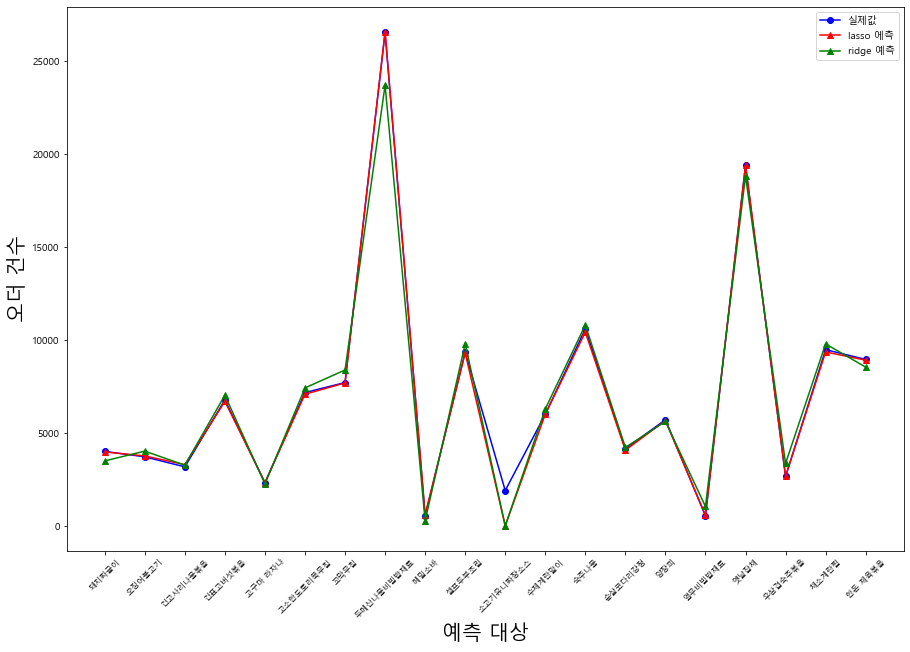

In [137]:
fig = plt.figure(figsize=(15,10))
chart = fig.add_subplot(1,1,1)
chart.plot(y_test.sum(), marker='o', color='blue', label='실제값')
chart.plot(lasso_test_pred.sum(), marker='^', color='red', label='lasso 에측')
chart.plot(ridge_test_pred.sum(), marker='^', color='green', label='ridge 예측')
chart.set_xticklabels(xlabel, rotation=45, size=8)
plt.xlabel('예측 대상', size=20)
plt.ylabel('오더 건수', size=20)
plt.legend(loc='best')

### 3.6 모델 저장

In [138]:
import joblib

joblib.dump(lasso_reg, 'C:\\Users\\user\\Dongwon\\Dongwon_Project\\더반찬_XGB모델\\0708_lasso_model.pkl')
joblib.dump(ridge_reg, 'C:\\Users\\user\\Dongwon\\Dongwon_Project\\더반찬_XGB모델\\0708_ridge_model.pkl')

['C:\\Users\\user\\Dongwon\\Dongwon_Project\\더반찬_XGB모델\\0708_ridge_model.pkl']

In [3]:
import joblib
model = joblib.load('C:\\Users\\user\\Dongwon\\Dongwon_Project\\더반찬_XGB모델\\0707_xgb_model_ne1500.pkl')

In [ ]:
test_model = model.predict()